<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/DataPreparation_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Cleaning

Variables Analysis Excel:
https://sjsu0-my.sharepoint.com/:x:/g/personal/juhi_nayak_sjsu_edu/EXjGpC6keKRPkbOKv_nb5kcBo_NcIAqFsReNJq-B5N5yPA?e=lUnXU3

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Acess shared file from google drive
# Connect to Google Drive to fetch the dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Go to Google Drive, right click on the folder in question, and then click "Add shortcut to Drive". This will allow you to access the folder from your drive!
# List the files available in the drive location
# !ls ./drive/My\ Drive/Colab\ Notebooks/Dataset
!ls ./drive/My\ Drive/datasets/loan-prediction

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive
lending-club	   test_Y3wMUE5_7gLdaTN.csv
SPSS_loan_roc.sav  train_u6lujuX_CVtuZ9i.csv


### Read and Analyse varioius Datasets

#### Loan Prediction Problem Dataset
Go to the folder sign available at the left side in google colab file. Find the file and copy the path.


Dataset Source: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

In [ ]:
# copy the path from File if left-hand-side corner in colab notebook
path = "/content/drive/My Drive/datasets/loan-prediction/train_u6lujuX_CVtuZ9i.csv"
df_Loan = pd.read_csv(path)
# df_Loan.head(5)
print(df_Loan.head(5))
df_Loan.Loan_Amount_Term.unique()

# Provides infromation about the dataset
print(df_Loan.info())

# Description about dataset
print(df_Loan.describe())

    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7

maximum value of ApplicantIncome and CoapplicantIncome is much higher than the 75%of the data of ApplicantIncome and CoapplicantIncome respectively.

In [ ]:
min = df_Loan.min()
max = df_Loan.max()
min,max

(Loan_ID              LP001002
 Education            Graduate
 ApplicantIncome           150
 CoapplicantIncome           0
 LoanAmount                  9
 Loan_Amount_Term           12
 Credit_History              0
 Property_Area           Rural
 Loan_Status                 N
 dtype: object, Loan_ID                  LP002990
 Education            Not Graduate
 ApplicantIncome             81000
 CoapplicantIncome           41667
 LoanAmount                    700
 Loan_Amount_Term              480
 Credit_History                  1
 Property_Area               Urban
 Loan_Status                     Y
 dtype: object)

In [ ]:
print(df_Loan['Self_Employed'].value_counts())
print(pd.value_counts(df_Loan.Loan_Status).to_frame().reset_index())

No     500
Yes     82
Name: Self_Employed, dtype: int64
  index  Loan_Status
0     Y          422
1     N          192


#### Lending Club Dataset

Dataset Source: https://www.kaggle.com/wordsforthewise/lending-club

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/lending-club/accepted_2007_to_2018Q4.csv.gz"
df_LendingClub = pd.read_csv(path)
df_LendingClub.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_LendingClub.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
df_LendingClub.purpose.unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational', nan], dtype=object)

In [ ]:
df_LendingClub.emp_length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [ ]:
df_LendingClub.emp_length.describe()

count       2113761
unique           11
top       10+ years
freq         748005
Name: emp_length, dtype: object

In [ ]:
df_LendingClub['emp_length'].value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [ ]:
df_LendingClub['home_ownership'].value_counts()

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [ ]:
# store only selected columns into another dataframe
df_shrink_LC = df_LendingClub[["emp_length","loan_amnt","term","annual_inc","loan_status","purpose","home_ownership"]]
df_shrink_LC.head(5)

,emp_length,loan_amnt,term,annual_inc,loan_status,purpose,home_ownership
0,10+ years,3600.0,36 months,55000.0,Fully Paid,debt_consolidation,MORTGAGE
1,10+ years,24700.0,36 months,65000.0,Fully Paid,small_business,MORTGAGE
2,10+ years,20000.0,60 months,63000.0,Fully Paid,home_improvement,MORTGAGE
3,10+ years,35000.0,60 months,110000.0,Current,debt_consolidation,MORTGAGE
4,3 years,10400.0,60 months,104433.0,Fully Paid,major_purchase,MORTGAGE


#### SPSS Dataset

Data Source: http://calcnet.mth.cmich.edu/org/spss/prj_loan_data.htm


In [ ]:
# To read the file with fromat .sav, install the packge pyreadstat
!pip install pyreadstat
import pyreadstat

path = "/content/drive/My Drive/datasets/loan-prediction/SPSS_loan_roc.sav"
df_spss, meta = pyreadstat.read_sav(path)
df_spss.head(5)

,age,education,year_emp,income,debt_income,cred_debt,other_debt,Loan,Logistc,PGR_1,Dis_1,Dis1_1,Discrim
0,47.0,1.0,22.0,81.0,5.5,1.505790,2.949210,0.0,0.000625,0.0,0.0,0.988438,0.011562
1,40.0,1.0,22.0,95.0,3.6,0.632700,2.787300,0.0,0.001633,0.0,0.0,0.973334,0.026666
2,35.0,1.0,16.0,36.0,3.4,0.178704,1.045296,0.0,0.000966,0.0,0.0,0.988864,0.011136
3,43.0,1.0,16.0,89.0,0.4,0.159488,0.196512,0.0,0.001386,0.0,0.0,0.974100,0.025900
4,47.0,1.0,26.0,100.0,12.8,4.582400,8.217600,0.0,0.012345,0.0,0.0,0.931966,0.068034


In [ ]:
print(df_spss.PGR_1.value_counts())
print(df_spss.info())
print(df_spss.describe())
print(df_spss['year_emp'].value_counts())

0.0    83
1.0    17
Name: PGR_1, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          100 non-null    float64
 1   education    100 non-null    float64
 2   year_emp     100 non-null    float64
 3   income       100 non-null    float64
 4   debt_income  100 non-null    float64
 5   cred_debt    100 non-null    float64
 6   other_debt   100 non-null    float64
 7   Loan         84 non-null     float64
 8   Logistc      100 non-null    float64
 9   PGR_1        100 non-null    float64
 10  Dis_1        100 non-null    float64
 11  Dis1_1       100 non-null    float64
 12  Discrim      100 non-null    float64
dtypes: float64(13)
memory usage: 10.3 KB
None
              age   education    year_emp  ...       Dis_1      Dis1_1     Discrim
count  100.000000  100.000000  100.000000  ...  100.000000  100.000000  100.000000
mean   

By looking into all the three datasets, The combination of columns mostly match with Loan Prediction Problem dataset and Lending Club Dataset. So to procced further we have to drop off SPSS dataset.

### Data Clean and Modification
On checking the combined data for both the datasets (Lending Club and Loan Prediction Problem), we need to either drop some unwanted columns or have to edit the content to have the similarity between the data form both the datsets.

#### *Loan Predicton Problem Dataset*


##### Read Data

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/train_u6lujuX_CVtuZ9i.csv"
df_Loan = pd.read_csv(path)
df_Loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Take only required columns from the original datset and drop the unnecessary variables
df_Loan.drop(['Loan_ID','Gender','Married','Property_Area'],axis=1, inplace=True)
df_Loan.head(5)

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [ ]:
print(df_Loan.Loan_Status.value_counts())
print(df_Loan.Dependents.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


##### Handle Missing values

In [ ]:
##### Checking for missing values
print(df_Loan.isnull().sum())

# Fill the 22 blank LoanAmount and 14 Loan_Amount_Term with the mean value
df_Loan['LoanAmount']=df_Loan['LoanAmount'].fillna(df_Loan['LoanAmount'].mean())
df_Loan['Loan_Amount_Term']=df_Loan['Loan_Amount_Term'].fillna(df_Loan['Loan_Amount_Term'].mean())

#### Convert Dependents data to Numeric
print(df_Loan.Dependents.unique())
df_Loan['Dependents'] = df_Loan['Dependents'].map({'0':0, '1':1, '2':2,'3+':3})
print(df_Loan.Dependents.unique())
df_Loan['Dependents']=df_Loan['Dependents'].fillna(2)
print(df_Loan.Dependents.unique())

print(df_Loan.isnull().sum())

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64
['0' '1' '2' '3+' nan]
[ 0.  1.  2.  3. nan]
[0. 1. 2. 3.]
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Loan_Status           0
dtype: int64


##### Variables Modifications

In [ ]:
df_Loan.head(2)

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y
1,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N


In [ ]:
# Add the columns 'Applicant Income' and 'CoapplicantIncome' to get the total annual income.
df_Loan["Annual_Income"] = df_Loan["ApplicantIncome"] + df_Loan["CoapplicantIncome"]

##### Convert Loan_Status to Numeric
# Change the Loan Status Nominal values to numeric value
df_Loan['Loan_Status_Numeric'] = df_Loan['Loan_Status'].map({'Y': 1, 'N': 0})

#### Add New Columns
# Add a new column to have the purpose converting house as '4' becuase Lending club has value as 4 for house
df_Loan['Purpose'] = 4
# Add a new column "Employed" as 1. Self_Employed column indicates whether the applicant is self-employed or not but we assume evey applicant is employed. 
df_Loan["Employed"] = 1
# Add a new column for home_ownership as mortgage as '1' becuase Lending club has value as 1 for MORTGAGE
df_Loan["Home_Ownership"] = 1

##### Rename Columns
df_Loan.rename(columns={ 'LoanAmount': 'Loan_Amount','Loan_Amount_Term': 'Loan_Term'}, inplace=True)

##### Drop unnecessary variables
# if required, we can drop unnnecessary columns to have the consistancy between the two datasets columns
df_Loan.drop(['Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','Loan_Status'],
             axis=1, inplace=True)

df_Loan.head(10)

,Dependents,Loan_Amount,Loan_Term,Credit_History,Annual_Income,Loan_Status_Numeric,Purpose,Employed,Home_Ownership
0,0.0,146.412162,360.0,1.0,5849.0,1,4,1,1
1,1.0,128.000000,360.0,1.0,6091.0,0,4,1,1
2,0.0,66.000000,360.0,1.0,3000.0,1,4,1,1
3,0.0,120.000000,360.0,1.0,4941.0,1,4,1,1
4,0.0,141.000000,360.0,1.0,6000.0,1,4,1,1
5,2.0,267.000000,360.0,1.0,9613.0,1,4,1,1
6,0.0,95.000000,360.0,1.0,3849.0,1,4,1,1
7,3.0,158.000000,360.0,0.0,5540.0,0,4,1,1
8,2.0,168.000000,360.0,1.0,5532.0,1,4,1,1
9,1.0,349.000000,360.0,1.0,23809.0,0,4,1,1


In [ ]:
df_Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependents           614 non-null    float64
 1   Loan_Amount          614 non-null    float64
 2   Loan_Term            614 non-null    float64
 3   Credit_History       564 non-null    float64
 4   Annual_Income        614 non-null    float64
 5   Loan_Status_Numeric  614 non-null    int64  
 6   Purpose              614 non-null    int64  
 7   Employed             614 non-null    int64  
 8   Home_Ownership       614 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 43.3 KB


#### *Lending Club Dataset*

##### ***Loan Accepted Dataset***

###### Read Data

In [ ]:
# Take only the latest data for year 2018

data = pd.read_csv(
    '/content/drive/My Drive/datasets/loan-prediction/lending-club/accepted_2007_to_2018Q4.csv.gz',
    parse_dates=['issue_d'], infer_datetime_format=True,low_memory=False)
data = data[(data.issue_d >= '2018-01-01 00:00:00') & (data.issue_d < '2019-01-01 00:00:00')]
data = data.reset_index(drop=True)

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,130954621,NaN,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,RENT,50000.0,Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,740xx,OK,21.80,1.0,Jan-2009,665.0,669.0,0.0,9.0,NaN,5.0,0.0,116.0,23.2,18.0,w,3780.31,3780.31,...,33430.0,19344.0,500.0,27820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,130964697,NaN,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,OWN,196000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,337xx,FL,18.29,0.0,Jul-1998,700.0,704.0,0.0,65.0,NaN,19.0,0.0,24243.0,46.3,53.0,w,10878.50,10878.50,...,605228.0,137713.0,28500.0,147178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,130955326,NaN,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,665.0,669.0,2.0,6.0,NaN,8.0,0.0,1526.0,24.6,14.0,w,10193.73,10193.73,...,80367.0,67173.0,1900.0,74167.0,7101.0,610.0,614.0,Feb-2005,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,130504052,NaN,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,665.0,669.0,1.0,22.0,NaN,7.0,0.0,8657.0,98.4,16.0,w,22188.73,22188.73,...,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,130956066,NaN,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,Source Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,988xx,WA,0.58,0.0,Jan-1998,760.0,764.0,0.0,26.0,NaN,7.0,0.0,141.0,0.5,30.0,w,0.00,0.00,...,191216.0,141.0,30500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
###### Choose required columns
# Create a new dataframe with only required number of columns
df_LendingClub = data[['purpose','annual_inc','loan_amnt','term','loan_status','home_ownership','issue_d','emp_length']]
df_LendingClub.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,issue_d,emp_length
0,other,50000.0,5000.0,36 months,Current,RENT,2018-03-01,8 years
1,debt_consolidation,196000.0,15000.0,36 months,Current,OWN,2018-03-01,2 years
2,medical,44000.0,11200.0,60 months,Current,RENT,2018-03-01,< 1 year
3,debt_consolidation,65000.0,25000.0,60 months,Current,MORTGAGE,2018-03-01,10+ years
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,2018-03-01,9 years


###### Handle Missing Values

In [ ]:
# Check the null values
print(df_LendingClub.isnull().sum())
# drop the rows with null values on emp_length
df_LendingClub.dropna(subset=['emp_length'], inplace=True)
# Add mean value for missing values of dti
# df_LendingClub['dti']=df_LendingClub['dti'].fillna(df_LendingClub['dti'].mean())

df_LendingClub.info()

purpose               0
annual_inc            0
loan_amnt             0
term                  0
loan_status           0
home_ownership        0
issue_d               0
emp_length        41987
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 453255 entries, 0 to 495241
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   purpose         453255 non-null  object        
 1   annual_inc      453255 non-null  float64       
 2   loan_amnt       453255 non-null  float64       
 3   term            453255 non-null  object        
 4   loan_status     453255 non-null  object        
 5   home_ownership  453255 non-null  object        
 6   issue_d         453255 non-null  datetime64[ns]
 7   emp_length      453255 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 31.1+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


###### Variables Modification

In [ ]:
# Manage Loan_status Column

print(df_LendingClub.loan_status.value_counts())

# Remove the 'Current' loan status values
df_LendingClub = df_LendingClub[df_LendingClub.loan_status != 'Current']
print(df_LendingClub.loan_status.value_counts())

# Add a new column for Loan_Status having Y/N
df_LendingClub['Loan_Status'] = df_LendingClub['loan_status'].map({'Fully Paid':'Y', 'Charged Off':'N', 'Late (31-120 days)':'N',
                                                                   'In Grace Period':'N','Late (16-30 days)':'N','Default':'N'})
print(df_LendingClub.Loan_Status.value_counts())

# Convert Loan_Status to numeric value
df_LendingClub['Loan_Status_Numeric'] = df_LendingClub['Loan_Status'].map({'Y': 1, 'N': 0})
df_LendingClub.head(5)

Current               391338
Fully Paid             43694
Charged Off             7683
Late (31-120 days)      6477
In Grace Period         2656
Late (16-30 days)       1400
Default                    7
Name: loan_status, dtype: int64
Fully Paid            43694
Charged Off            7683
Late (31-120 days)     6477
In Grace Period        2656
Late (16-30 days)      1400
Default                   7
Name: loan_status, dtype: int64
Y    43694
N    18223
Name: Loan_Status, dtype: int64


,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,issue_d,emp_length,Loan_Status,Loan_Status_Numeric
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,2018-03-01,9 years,Y,1
16,other,55000.0,5000.0,36 months,Fully Paid,OWN,2018-03-01,10+ years,Y,1
23,home_improvement,40000.0,7000.0,36 months,Fully Paid,MORTGAGE,2018-03-01,< 1 year,Y,1
24,credit_card,55000.0,20300.0,60 months,Late (31-120 days),RENT,2018-03-01,< 1 year,N,0
38,debt_consolidation,57000.0,30000.0,36 months,Fully Paid,OWN,2018-03-01,10+ years,Y,1


In [ ]:
print(df_LendingClub.purpose.unique())
print(df_LendingClub.info())
data.describe()

['major_purchase' 'other' 'home_improvement' 'credit_card'
 'debt_consolidation' 'house' 'small_business' 'car' 'medical' 'vacation'
 'moving' 'renewable_energy' 'wedding']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61917 entries, 4 to 495238
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   purpose              61917 non-null  object        
 1   annual_inc           61917 non-null  float64       
 2   loan_amnt            61917 non-null  float64       
 3   term                 61917 non-null  object        
 4   loan_status          61917 non-null  object        
 5   home_ownership       61917 non-null  object        
 6   issue_d              61917 non-null  datetime64[ns]
 7   emp_length           61917 non-null  object        
 8   Loan_Status          61917 non-null  object        
 9   Loan_Status_Numeric  61917 non-null  int64         
dtypes: datetime64[ns](1), float6

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,4.952420e+05,494110.000000,495242.000000,495242.000000,495242.000000,495242.000000,218590.000000,62984.000000,495242.000000,495242.000000,4.952420e+05,494650.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.00000,114833.000000,495242.0,6.898500e+04,68985.000000,495242.000000,4.952420e+05,4.952420e+05,495242.000000,...,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,482838.0,495242.000000,495242.000000,495242.000000,495240.000000,488646.000000,495242.000000,495242.000000,4.952420e+05,4.952420e+05,4.952420e+05,4.952420e+05,6.898500e+04,68985.000000,68985.000000,68985.000000,68985.000000,68985.000000,67788.000000,68985.000000,68985.000000,68985.000000,68985.000000,22377.000000,368.0,368.000000,368.0,368.000000,321.000000,368.000000,368.000000,480.000000,480.000000,480.000000
mean,NaN,16025.020394,16025.020394,16021.669277,12.729072,466.612858,8.009399e+04,19.668887,0.229252,706.403637,710.403974,0.442192,36.889771,83.338689,11.491554,0.134514,1.627083e+04,43.877831,22.624151,12007.169172,12004.842029,4925.154778,4923.958198,3735.078047,1179.621827,0.512806,9.942098,1.747514,1599.760632,709.383326,703.734084,0.01768,46.319281,1.0,1.283419e+05,19.357812,0.000052,2.143619e+02,1.439598e+05,0.898078,...,7.092944,8.169146,8.163348,12.918500,5.324668,11.470647,0.0,0.000046,0.059932,2.030478,94.580900,32.891971,0.123489,0.010918,1.849417e+05,5.192192e+04,2.667946e+04,4.568810e+04,3.475705e+04,671.835471,675.835486,0.607538,1.538189,11.486497,57.108528,2.998043,12.517707,0.041748,0.070943,37.326183,3.0,196.141902,3.0,12.760870,595.377850,15633.306304,215.650815,7145.746083,54.567729,18.022917
std,NaN,10138.075023,10138.075023,10137.900298,5.150204,286.909624,8.887161e+04,20.458244,0.743665,36.045280,36.046582,0.724613,21.777614,23.067742,5.947129,0.384829,2.283236e+04,24.909817,12.104004,9433.669482,9433.494024,5582.696299,5581.731532,5241.807689,1129.153441,5.864272,194.694939,34.576367,4596.678963,51.721311,64.672805,0.14657,21.603329,0.0,8.432331e+04,8.089185,0.007245,1.166300e+04,1.674899e+05,1.121055,...,4.520551,7.353481,4.936628,7.896373,3.366916,5.941238,0.0,0.006815,0.420412,1.890030,9.092862,35.015405,0.335296,0.182740,1.886940e+05,5.339667e+04,2.582489e+04,4.797206e+04,2.959911e+04,44.853131,44.853187,0.969398,1.766506,6.670732,25.836450,3.236424,8.211074,0.390470,0.393264,23.803320,0.0,147.686771,0.0,8.979989,451.388039,9434.677

In [ ]:
# Create a new column 'Employeed' with employed value as 1 and update the unemployement as 0 based on emp_length where emp_length < 1
df_LendingClub['Employed'] = df_LendingClub['emp_length'].map({'< 1 year': 0, '10+ years' : 1, '2 years': 1, '3 years': 1, '1 year': 1, 
                                                               '4 years' : 1, '5 years': 1, '6 years': 1, '7 years': 1, '8 years' : 1, '9 years': 1,})
# convert the data type to sync with another dataset
df_LendingClub['Loan_Term'] = df_LendingClub['term'].map({' 36 months':36.0, ' 60 months':60.0})

purpose_dict = {}
purpose = np.unique(df_LendingClub['purpose']).tolist()
for i in range(len(purpose)):
        purpose_dict[purpose[i]] = i
df_LendingClub['Numeric_Purpose'] = [purpose_dict[l] for l in df_LendingClub['purpose']]


home_dict = {}
home = np.unique(df_LendingClub['home_ownership']).tolist()
for i in range(len(home)):
        home_dict[home[i]] = i
df_LendingClub['Numeric_Home_Ownership'] = [home_dict[l] for l in df_LendingClub['home_ownership']]

# df_LendingClub.drop(['Purpose','Home_Ownership','Loan_Status','dti','Age','emp_length_numeric'], axis=1, inplace=True)

In [ ]:
df_LendingClub.head(10)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,issue_d,emp_length,Loan_Status,Loan_Status_Numeric,Employed,Loan_Term,Numeric_Purpose,Numeric_Home_Ownership
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,2018-03-01,9 years,Y,1,1,36.0,5,3
16,other,55000.0,5000.0,36 months,Fully Paid,OWN,2018-03-01,10+ years,Y,1,1,36.0,8,2
23,home_improvement,40000.0,7000.0,36 months,Fully Paid,MORTGAGE,2018-03-01,< 1 year,Y,1,0,36.0,3,1
24,credit_card,55000.0,20300.0,60 months,Late (31-120 days),RENT,2018-03-01,< 1 year,N,0,0,60.0,1,3
38,debt_consolidation,57000.0,30000.0,36 months,Fully Paid,OWN,2018-03-01,10+ years,Y,1,1,36.0,2,2
40,house,85000.0,21000.0,60 months,Fully Paid,OWN,2018-03-01,10+ years,Y,1,1,60.0,4,2
42,debt_consolidation,150000.0,40000.0,60 months,Fully Paid,MORTGAGE,2018-03-01,10+ years,Y,1,1,60.0,2,1
50,credit_card,36610.0,5000.0,36 months,Fully Paid,RENT,2018-03-01,2 years,Y,1,1,36.0,1,3
68,home_improvement,86000.0,15000.0,36 months,Fully Paid,MORTGAGE,2018-03-01,2 years,Y,1,1,36.0,3,1
71,debt_consolidation,38000.0,12000.0,36 months,Fully Paid,RENT,2018-03-01,5 years,Y,1,1,36.0,2,3


###### Drop unnnecessary variables

In [ ]:
# if required, we can drop unnnecessary columns to have the consistancy between the two datasets columns
df_LendingClub.drop(['purpose','term','loan_status','home_ownership','issue_d','emp_length','Loan_Status'], axis=1, inplace=True)

In [ ]:
df_LendingClub.head(2)

,annual_inc,loan_amnt,Loan_Status_Numeric,Employed,Loan_Term,Numeric_Purpose,Numeric_Home_Ownership
4,52000.0,3000.0,1,1,36.0,5,3
16,55000.0,5000.0,1,1,36.0,8,2


In [ ]:
df_LendingClub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61917 entries, 4 to 495238
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_inc              61917 non-null  float64
 1   loan_amnt               61917 non-null  float64
 2   Loan_Status_Numeric     61917 non-null  int64  
 3   Employed                61917 non-null  int64  
 4   Loan_Term               61917 non-null  float64
 5   Numeric_Purpose         61917 non-null  int64  
 6   Numeric_Home_Ownership  61917 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.8 MB


In [ ]:
# Add a new column for Age. Considering on average starting age of employment is 21 and adding the respective employment length to calculate the age
# df_LendingClub['emp_length_numeric'] = df_LendingClub['emp_length'].map({'< 1 year': 0, '10+ years' : 10, '2 years': 2, '3 years': 3, '1 year': 1, 
#                                                                          '4 years' : 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years' : 8, '9 years': 9})

# print(df_LendingClub.emp_length_numeric.value_counts())

# df_LendingClub['Age'] = [21+ele for ele in df_LendingClub['emp_length_numeric']]
# print(df_LendingClub.Age.value_counts())

### Performing MLP Regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
Z = df_Loan.loc[(df_Loan['Annual_Income']>=0),['Annual_Income']]

X = Z['Annual_Income'].values.reshape(-1,1)
y = df_Loan['Dependents'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.30)

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       115
         1.0       0.00      0.00      0.00        27
         2.0       0.15      1.00      0.26        28
         3.0       0.00      0.00      0.00        15

    accuracy                           0.15       185
   macro avg       0.04      0.25      0.07       185
weighted avg       0.02      0.15      0.04       185

[[  0   0 115   0]
 [  0   0  27   0]
 [  0   0  28   0]
 [  0   0  15   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
regr = MLPRegressor()
regr.fit(X_train, y_train)
print(regr)

expected_y  = y_test
predicted_y = regr.predict(X_test)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

-0.2723778186854018
0.3130121114125442


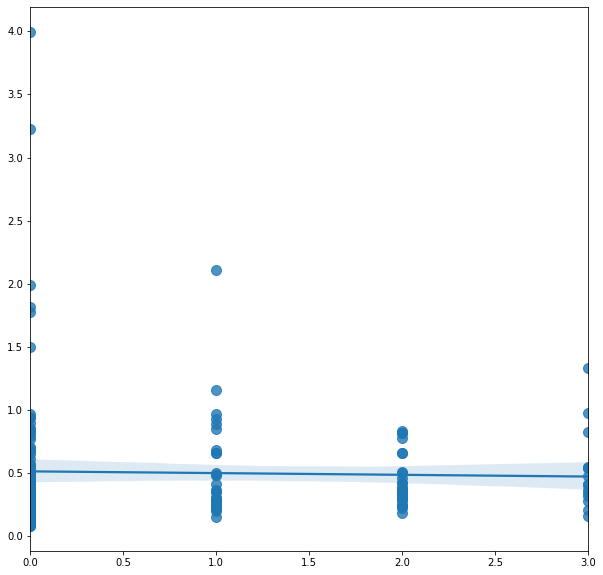

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### Linear regression on Dependents

In [ ]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import metrics
%matplotlib inline

In [ ]:
df_Loan_predict = df_Loan.copy()
df_Loan_predict.drop(['Credit_History'],axis=1,inplace=True)
df_Loan_predict.head

<bound method NDFrame.head of      Dependents  Loan_Amount  Loan_Term  ...  Purpose  Employed  Home_Ownership
0           0.0   146.412162      360.0  ...        4         1               1
1           1.0   128.000000      360.0  ...        4         1               1
2           0.0    66.000000      360.0  ...        4         1               1
3           0.0   120.000000      360.0  ...        4         1               1
4           0.0   141.000000      360.0  ...        4         1               1
..          ...          ...        ...  ...      ...       ...             ...
609         0.0    71.000000      360.0  ...        4         1               1
610         3.0    40.000000      180.0  ...        4         1               1
611         1.0   253.000000      360.0  ...        4         1               1
612         2.0   187.000000      360.0  ...        4         1               1
613         0.0   133.000000      360.0  ...        4         1               1

[614 rows

In [ ]:
df_Lending_predict = df_LendingClub.copy()
df_Lending_predict

,annual_inc,loan_amnt,Loan_Status_Numeric,Employed,Loan_Term,Numeric_Purpose,Numeric_Home_Ownership
4,52000.0,3000.0,1,1,36.0,5,3
16,55000.0,5000.0,1,1,36.0,8,2
23,40000.0,7000.0,1,0,36.0,3,1
24,55000.0,20300.0,0,0,60.0,1,3
38,57000.0,30000.0,1,1,36.0,2,2
...,...,...,...,...,...,...,...
495223,100000.0,35000.0,1,1,36.0,8,1
495227,112000.0,12300.0,1,1,36.0,2,1
495231,85000.0,9000.0,0,1,36.0,1,3
495233,32000.0,5000.0,1,1,36.0,2,1


Index(['Loan_Term', 'Loan_Status_Numeric'], dtype='object')
Mean Absolute Error: 0.9197767771520525
Mean Squared Error: 1.0769745902548629
Root Mean Squared Error: 1.0377738627730335


,Actual,Predicted
0,0.0,0.860776
1,0.0,0.786563
2,0.0,0.860776
3,0.0,0.786563
4,2.0,0.860776
...,...,...
241,2.0,0.786563
242,1.0,0.784079
243,1.0,0.786563
244,3.0,0.858291


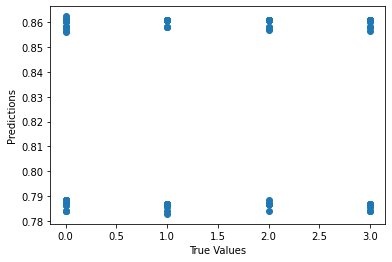

In [ ]:
df_Loan_predict = df_Loan.copy()
df_Lending_predict = df_LendingClub.copy()

# X = df_Loan_predict[['Annual_Income','Loan_Amount','Loan_Term','Loan_Status_Numeric','Employed','Numeric_Purpose','Numeric_Home_Ownership']]
X = df_Loan_predict[['Loan_Term','Loan_Status_Numeric']]
print(X.columns)
y = df_Loan_predict['Dependents'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1
# from google.colab import data_table
# data_table.DataTable(df1)

In [ ]:
df_Lending_predict = df_Lending_predict[['Loan_Term','Loan_Status_Numeric']]
dependents_pred = regressor.predict(df_Lending_predict)
df_Lending_predict['Dependents'] = dependents_pred
df_Lending_predict

,Loan_Term,Loan_Status_Numeric,Dependents
4,36.0,1,0.856304
16,36.0,1,0.856304
23,36.0,1,0.856304
24,60.0,0,0.782423
38,36.0,1,0.856304
...,...,...,...
495223,36.0,1,0.856304
495227,36.0,1,0.856304
495231,36.0,0,0.782092
495233,36.0,1,0.856304


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
y = df_Loan_predict['Dependents']

In [ ]:
df_Loan_predict.drop(['Dependents'], axis=1, inplace=True)

[0.42400635 0.05636678 0.51052393 0.00910295 0.         0.
 0.        ]


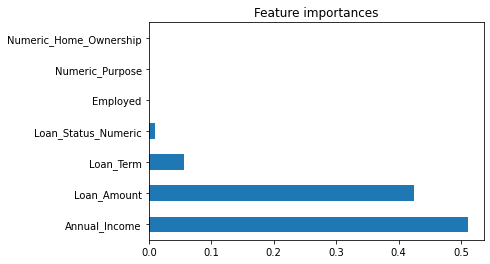

In [ ]:
model = ExtraTreesClassifier(criterion='gini') # “gini” for the Gini impurity and “entropy” for the information gain.
model.fit(df_Loan_predict, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_Loan_predict.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

In [ ]:
df_Lending_predict.describe()

,Loan_Term,Dependents
count,61917.000000,61917.000000
mean,42.936383,0.830721
std,10.879416,0.000226
min,36.000000,0.830577
25%,36.000000,0.830577
50%,36.000000,0.830577
75%,60.000000,0.831075
max,60.000000,0.831075


The Lending Club dataset does not even has this feature. So we tried to do imputation and tried to predit the value for the 'depenednt' feature but doesn't provide a valid value upon predicting. Also, by looking into the result of the regression we conclude that the feature 'Dependents' is not important.

### Logistic regression on Credit History

In [ ]:
# Loan prediction dataset
df_Loan.head(5)

,Loan_Amount,Loan_Term,Credit_History,Annual_Income,Loan_Status_Numeric,Purpose,Employed,Home_Ownership
0,146.412162,360.0,1.0,5849.0,1,4,1,1
1,128.000000,360.0,1.0,6091.0,0,4,1,1
2,66.000000,360.0,1.0,3000.0,1,4,1,1
3,120.000000,360.0,1.0,4941.0,1,4,1,1
4,141.000000,360.0,1.0,6000.0,1,4,1,1


In [ ]:
# Lending Club dataset
df_LendingClub.head(5)

,annual_inc,loan_amnt,Loan_Status_Numeric,Employed,Loan_Term,Numeric_Purpose,Numeric_Home_Ownership
4,52000.0,3000.0,1,1,36.0,5,3
16,55000.0,5000.0,1,1,36.0,8,2
23,40000.0,7000.0,1,0,36.0,3,1
24,55000.0,20300.0,0,0,60.0,1,3
38,57000.0,30000.0,1,1,36.0,2,2


### Combine data sets

In [ ]:
print(df_Loan.shape)
# dropping 'Dependents' column based on the conclusion from linear regression
df_Loan.drop(['Dependents'],axis=1,inplace=True)
df_Loan.head(2)

(614, 9)


,Loan_Amount,Loan_Term,Credit_History,Annual_Income,Loan_Status_Numeric,Purpose,Employed,Home_Ownership
0,146.412162,360.0,1.0,5849.0,1,4,1,1
1,128.000000,360.0,1.0,6091.0,0,4,1,1


In [ ]:
print(df_LendingClub.shape)
df_LendingClub.head(2)

(61917, 7)


,annual_inc,loan_amnt,Loan_Status_Numeric,Employed,Loan_Term,Numeric_Purpose,Numeric_Home_Ownership
4,52000.0,3000.0,1,1,36.0,5,3
16,55000.0,5000.0,1,1,36.0,8,2


In [ ]:
# Rename the column names to have symmetry between two datasets
# df_LendingClub.rename(columns={'purpose': 'Purpose', 'annual_inc': 'Annual_Income', 'loan_amnt': 'Loan_Amount',
#                                              'term': 'Loan_Term', 'home_ownership': 'Home_Ownership'}, inplace=True)

In [ ]:
# Create a new final dataframe combining both the dataframes
final_df = pd.concat([df_Loan,df_LendingClub], axis=0, ignore_index=True)


In [ ]:
final_df.head(620)

,Dependents,Education,Loan_Amount,Loan_Term,Loan_Status,Annual_Income,Loan_Status_Numeric,Purpose,Employed,Home_Ownership,emp_length_numeric,Age
0,0.0,Graduate,146.412162,360.0,Y,5849.0,1,House,1,MORTGAGE,NaN,NaN
1,1.0,Graduate,128.000000,360.0,N,6091.0,0,House,1,MORTGAGE,NaN,NaN
2,0.0,Graduate,66.000000,360.0,Y,3000.0,1,House,1,MORTGAGE,NaN,NaN
3,0.0,Not Graduate,120.000000,360.0,Y,4941.0,1,House,1,MORTGAGE,NaN,NaN
4,0.0,Graduate,141.000000,360.0,Y,6000.0,1,House,1,MORTGAGE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
615,NaN,NaN,5000.000000,36.0,Y,55000.0,1,other,1,OWN,10.0,31.0
616,NaN,NaN,7000.000000,36.0,Y,40000.0,1,home_improvement,0,MORTGAGE,0.0,21.0
617,NaN,NaN,20300.000000,60.0,N,55000.0,0,credit_card,0,RENT,0.0,21.0
618,NaN,NaN,30000.000000,36.0,Y,57000.0,1,debt_consolidation,1,OWN,10.0,31.0


In [ ]:
final_df.shape

(62531, 12)